In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("snicker_dataset_with_dates.csv")
pd.set_option('display.max_columns', None)

df.head()

,name,type,total_produced,total_sold,damaged,month,year,edition,price,gender,sell_through_rate,damage_rate,unsold_inventory,estimated_revenue,quarter,date,is_limited_edition,price_bucket,manufacturing_date,selling_date
0,Nike Air Force 1 '07 Sneakers,Creamy,24592,5819,9012,September,2017,Limited,115,Men,23.662167,36.646064,9761,669185,Q3,2017-09-01,1,High,2017-09-01,2017-11-06
1,Adidas Originals Samba OG Shoes,Creamy,81482,16395,38698,September,2019,Standard,100,Men,20.121008,47.492698,26389,1639500,Q3,2019-09-01,0,Mid,2019-09-01,2019-09-30
2,Air Jordan 1 Mid Shoes,Peanut Butter,76237,8478,26062,January,2023,Special Release,110,Women,11.120584,34.185500,41697,932580,Q1,2023-01-01,1,High,2023-01-01,2023-03-28
3,Red Tape Casual Sneakers,Brownie,46463,5425,10463,October,2022,Anniversary,35,Men,11.675957,22.518994,30575,189875,Q4,2022-10-01,0,Low,2022-10-01,2022-12-15
4,Nike Court Vision Low Shoes,Peanut Butter,54118,11698,6078,April,2019,Standard,80,Women,21.615729,11.231014,36342,935840,Q2,2019-04-01,0,Mid,2019-04-01,2019-05-06


# First glance analysis.

## A “first‐glance analysis” (sometimes called an initial data check or data sanity check) is the very first pass you take at a new dataset—before any deeper Exploration or Modeling. It's an absolutely essential and foundational part of the Exploratory Data Analysis (EDA) process.

* By just looking at some rows in the dataset, it can be seen from the 'total_sold' column that only few quantity of the Total Products actually get sold and the 'damaged' column shows that the damaged products are of considerable size, and this should raise concerns.
* It can also be seen from the 'sell_through_rate' column that only few percentage of the Products actually get sold and when compared to the 'damage_rate' column, it show that the rate at which the product get damaged is also high. But more investigation would be done to confirm the meaning of the 'sell_through_rate' and the 'damage_rate' columns.
* Another column that could give more insights would be the 'unsold_inventory' column. The number in this column could represent products which fall into any of these categories:
-- 1. Stored/Not marketed yet,
-- 2. Are still being marketed or
-- 3. Were marketed but were not purchased by customers within a given period or at a specific point in time.
(If they were damaged there is a 'damaged' column already for the numbers to be recorded in)


* The meaning of this column (if found) would better explain the 'sell_through_rate', 'damage_rate' and possibly, other columns. It can also help define how I make some calculations, draw conclusions, and make decisions from the dataset.

## We will now take further look at the dataset before running a deeper anaysis.

In [5]:
print(df.shape, '\n')
print('-' * 50, '\n')
df.info() # -- Gain an overview of the contents of the data.

(500, 20) 

-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                500 non-null    object 
 1   type                500 non-null    object 
 2   total_produced      500 non-null    int64  
 3   total_sold          500 non-null    int64  
 4   damaged             500 non-null    int64  
 5   month               500 non-null    object 
 6   year                500 non-null    int64  
 7   edition             500 non-null    object 
 8   price               500 non-null    int64  
 9   gender              500 non-null    object 
 10  sell_through_rate   500 non-null    float64
 11  damage_rate         500 non-null    float64
 12  unsold_inventory    500 non-null    int64  
 13  estimated_revenue   500 non-null    int64  
 14  quarter             500 non-null    objec

In [7]:
print(df.isna().sum())

print('-' * 50)

df.loc[df.isna().any(axis = 'columns')]

name                  0
type                  0
total_produced        0
total_sold            0
damaged               0
month                 0
year                  0
edition               0
price                 0
gender                0
sell_through_rate     0
damage_rate           0
unsold_inventory      0
estimated_revenue     0
quarter               0
date                  0
is_limited_edition    0
price_bucket          0
manufacturing_date    0
selling_date          0
dtype: int64
--------------------------------------------------


,name,type,total_produced,total_sold,damaged,month,year,edition,price,gender,sell_through_rate,damage_rate,unsold_inventory,estimated_revenue,quarter,date,is_limited_edition,price_bucket,manufacturing_date,selling_date


### Checked for null values and found none

In [9]:
df.duplicated().sum()
# No duplicate values

0

### No duplicate values

## I wiil now have a statistical overview of the numerical columns.

In [11]:
df.describe()

,total_produced,total_sold,damaged,year,price,sell_through_rate,damage_rate,unsold_inventory,estimated_revenue,is_limited_edition
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,53757.092000,29288.500000,12631.32800,2019.558000,86.000000,55.946654,22.413722,11837.264000,2.494873e+06,0.380000
std,26087.657543,21573.376256,13908.38519,2.812553,23.023035,25.772110,19.458792,13373.964644,1.970713e+06,0.485873
min,10191.000000,5035.000000,6.00000,2015.000000,35.000000,6.381266,0.013924,9.000000,1.890000e+05,0.000000
25%,30015.000000,12550.750000,2366.00000,2017.000000,70.000000,33.568112,5.892475,2492.500000,1.011160e+06,0.000000
50%,53357.500000,22277.000000,7993.00000,2020.000000,82.500000,56.490418,17.676436,6646.500000,1.863760e+06,0.000000
75%,76635.000000,40691.500000,17290.50000,2022.000000,100.000000,77.717830,32.808431,17282.750000,3.338479e+06,1.000000
max,99922.000000,97181.000000,78238.00000,2024.000000,140.000000,99.831256,89.979847,66063.000000,1.068991e+07,1.000000


### From the statistical overview, we can see that the mean (average) for the total_sold is higher than that of the damaged products. This nullifies my first impression from my initial glance at the some rows in the datases. It means more products actually get sold from the toatal produced than the number that get damaged. A deeper analysis will make this clearer.

* The significant difference between the 75th percentile (17290.50) and the maximum value (78238.00) suggests that there might be some highly damaged items that are outliers.

# Deeper EDA and Data Preprocessing.
### In this section, we will use some Python codes to make a deeper exploration of the entire dataset, individual columns (Univariate analysi) and also examine selected columns together (Multivariate analysis).
### We will also simultaneously perform some data preprocessing steps as required.

### Romove trailing white spaces and maintain same casing convention for text columns.

In [14]:
df['name'].str.strip().str.title()
df['type'].str.strip().str.title()
df['month'].str.strip().str.title()
df['edition'].str.strip().str.title()
df['gender'].str.strip().str.title()
df['quarter'].str.strip().str.title()
print(None)

None


### Convert columns to proper data types.

In [9]:
df['manufacturing_date'] = pd.to_datetime(df['manufacturing_date'])
df['selling_date'] = pd.to_datetime(df['selling_date'])
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
df[['manufacturing_date', 'selling_date', 'year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   manufacturing_date  500 non-null    datetime64[ns]
 1   selling_date        500 non-null    datetime64[ns]
 2   year                500 non-null    int32         
dtypes: datetime64[ns](2), int32(1)
memory usage: 9.9 KB


### Let's conduct univariate analysis on some columns.

In [688]:
num_unique_names = len(df["name"].unique())
print(num_unique_names)

print('_' * 80)

df["name"].value_counts()

20
________________________________________________________________________________


name
Nike Air Force 1 '07 Sneakers      25
Adidas Originals Samba OG Shoes    25
Saucony Jazz Original              25
Hoka One One Clifton 8             25
Superga 2750 Cotu Classic          25
Lacoste Carnaby Evo                25
Onitsuka Tiger Mexico 66           25
Vans Old Skool                     25
Skechers D'Lites                   25
ASICS Gel-Quantum 90               25
Fila Disruptor II Premium          25
Under Armour Charged Assert 9      25
Reebok Classic Leather             25
New Balance 574 Core               25
Converse Chuck Taylor All Star     25
Puma Smash V2 Sneakers             25
Nike Court Vision Low Shoes        25
Red Tape Casual Sneakers           25
Air Jordan 1 Mid Shoes             25
Columbia Trailstorm Waterproof     25
Name: count, dtype: int64

## There are 20 different products (sneakers) in this dataset and the all appear an equal number of 25 times.

In [11]:
df['year'].unique()

array([2017, 2019, 2023, 2022, 2021, 2024, 2016, 2020, 2018, 2015])

In [691]:
gender_price = df.groupby(['name', 'gender'])['price'].mean()
gender_price

name                             gender
ASICS Gel-Quantum 90             Men       100.0
                                 Women     100.0
Adidas Originals Samba OG Shoes  Men       100.0
                                 Women     100.0
Air Jordan 1 Mid Shoes           Men       110.0
                                 Women     110.0
Columbia Trailstorm Waterproof   Men       110.0
                                 Women     110.0
Converse Chuck Taylor All Star   Men        60.0
                                 Women      60.0
Fila Disruptor II Premium        Men        70.0
                                 Women      70.0
Hoka One One Clifton 8           Men       140.0
                                 Women     140.0
Lacoste Carnaby Evo              Men        95.0
                                 Women      95.0
New Balance 574 Core             Men        90.0
                                 Women      90.0
Nike Air Force 1 '07 Sneakers    Men       115.0
                             

## Gender has no effect on the price of each product.

In [696]:
with pd.option_context('display.max_rows', None):
    display(df.groupby(['name', 'quarter'])[['price']].describe())

price                            \
                                        count   mean  std    min    25%   
name                            quarter                                   
ASICS Gel-Quantum 90            Q1        7.0  100.0  0.0  100.0  100.0   
                                Q2        7.0  100.0  0.0  100.0  100.0   
                                Q3        4.0  100.0  0.0  100.0  100.0   
                                Q4        7.0  100.0  0.0  100.0  100.0   
Adidas Originals Samba OG Shoes Q1        4.0  100.0  0.0  100.0  100.0   
                                Q2        6.0  100.0  0.0  100.0  100.0   
                                Q3        6.0  100.0  0.0  100.0  100.0   
                                Q4        9.0  100.0  0.0  100.0  100.0   
Air Jordan 1 Mid Shoes          Q1        9.0  110.0  0.0  110.0  110.0   
                                Q2        5.0  110.0  0.0  110.0  110.0   
                                Q3        5.0  110.0  0.0  110.0  110.0   
                                Q4        6.0  110.0  0.0  110.0  110.0   
Columbia Trailstorm Waterproof  Q1        4.0  110.0  0.0  110.0  110.0   
                                Q2        6.0  110.0  0.0  110.0  110.0   
                                Q3        8.0  110.0  0.0  110.0  110.0   
                                Q4        7.0  110.0  0.0  110.0  110.0   
Converse Chuck Taylor All Star  Q1        5.0   60.0  0.0   60.0   60.0   
                                Q2        4.0   60.0  0.0   60.0   60.0   
                                Q3        5.0   60.0  0.0   60.0   60.0   
                                Q4       11.0   60.0  0.0   60.0   60.0   
Fila Disruptor II Premium       Q1        6.0   70.0  0.0   70.0   70.0   
                                Q2        7.0   70.0  0.0   70.0   70.0   
                                Q3        7.0   70.0  0.0   70.0   70.0   
                                Q4        5.0   70.0  0.0   70.0   70.0   
Hoka One One Clifton 8          Q1        5.0  140.0  0.0  140.0  140.0   
                                Q2        9.0  140.0  0.0  140.0  140.0   
                                Q3        5.0  140.0  0.0  140.0  140.0   
                                Q4        6.0  140.0  0.0  140.0  140.0   
Lacoste Carnaby Evo             Q1        4.0   95.0  0.0   95.0   95.0   
                                Q2        5.0   95.0  0.0   95.0   95.0   
                                Q3        9.0   95.0  0.0   95.0   95.0   
                                Q4        7.0   95.0  0.0   95.0   95.0   
New Balance 574 Core            Q1        6.0   90.0  0.0   90.0   90.0   
                                Q2        6.0   90.0  0.0   90.0   90.0   
                                Q3        6.0   90.0  0.0   90.0   90.0   
                                Q4        7.0   90.0  0.0   90.0   90.0   
Nike Air Force 1 '07 Sneakers   Q1        5.0  115.0  0.0  115.0  115.0   
                                Q2        6.0  115.0  0.0  115.0  115.0   
                                Q3        7.0  115.0  0.0  115.0  115.0   
                                Q4        7.0  115.0  0.0  115.0  115.0   
Nike Court Vision Low Shoes     Q1        6.0   80.0  0.0   80.0   80.0   
                                Q2        6.0   80.0  0.0   80.0   80.0   
                                Q3        4.0   80.0  0.0   80.0   80.0   
                                Q4        9.0   80.0  0.0   80.0   80.0   
Onitsuka Tiger Mexico 66        Q1        3.0  100.0  0.0  100.0  100.0   
                                Q2        6.0  100.0  0.0  100.0  100.0   
                                Q3        8.0  100.0  0.0  100.0  100.0   
                                Q4        8.0  100.0  0.0  100.0  100.0   
Puma Smash V2 Sneakers          Q1        9.0   65.0  0.0   65.0   65.0   
                                Q2        5.0   65.0  0.0   65.0   65.0   
                                Q3        4.0   65.0  0.0   65.0 

In [15]:
with pd.option_context('display.max_rows', None):
    display(df.groupby(['name', 'year', 'edition'])[['price']].describe())

price                     \
                                                     count   mean  std    min   
name                            year edition                                    
ASICS Gel-Quantum 90            2015 Special Release   1.0  100.0  NaN  100.0   
                                2016 Anniversary       1.0  100.0  NaN  100.0   
                                     Special Release   1.0  100.0  NaN  100.0   
                                     Standard          1.0  100.0  NaN  100.0   
                                2017 Limited           1.0  100.0  NaN  100.0   
                                     Standard          1.0  100.0  NaN  100.0   
                                2018 Anniversary       2.0  100.0  0.0  100.0   
                                     Special Release   1.0  100.0  NaN  100.0   
                                     Standard          1.0  100.0  NaN  100.0   
                                2019 Holiday           1.0  100.0  NaN  100.0   
                                2020 Holiday           1.0  100.0  NaN  100.0   
                                     Limited           1.0  100.0  NaN  100.0   
                                2021 Anniversary       1.0  100.0  NaN  100.0   
                                     Special Release   2.0  100.0  0.0  100.0   
                                     Standard          1.0  100.0  NaN  100.0   
                                2022 Limited           2.0  100.0  0.0  100.0   
                                2023 Anniversary       1.0  100.0  NaN  100.0   
                                     Holiday           2.0  100.0  0.0  100.0   
                                     Special Release   1.0  100.0  NaN  100.0   
                                2024 Holiday           2.0  100.0  0.0  100.0   
Adidas Originals Samba OG Shoes 2015 Standard          1.0  100.0  NaN  100.0   
                                2016 Limited           1.0  100.0  NaN  100.0   
                                     Special Release   1.0  100.0  NaN  100.0   
                                2017 Anniversary       1.0  100.0  NaN  100.0   
                                     Limited           1.0  100.0  NaN  100.0   
                                     Special Release   2.0  100.0  0.0  100.0   
                                2018 Anniversary       2.0  100.0  0.0  100.0   
                                     Special Release   1.0  100.0  NaN  100.0   
                                     Standard          1.0  100.0  NaN  100.0   
                                2019 Anniversary       1.0  100.0  NaN  100.0   
                                     Limited           2.0  100.0  0.0  100.0   
                                     Standard          2.0  100.0  0.0  100.0   
                                2020 Limited           1.0  100.0  NaN  100.0   
                                     Special Release   1.0  100.0  NaN  100.0   
                                2021 Holiday           1.0  100.0  NaN  100.0   
                                     Special Release   1.0  100.0  NaN  100.0   
                                2022 Anniversary       1.0  100.0  NaN  100.0   
                                2024 Anniversary       2.0  100.0  0.0  100.0   
                                     Standard          2.0  100.0  0.0  100.0   
Air Jordan 1 Mid Shoes          2015 Anniversary       2.0  110.0  0.0  110.0   
                                     Limited           2.0  110.0  0.0  110.0   
                                2016 Anniversary       1.0  110.0  NaN  110.0   
                                     Standard          1.0  110.0  NaN  110.0   
                                2017 Limited           1.0  110.0  NaN  110.0   
                                2018 Anniversary       1.0  110.0  NaN  110.0   
                                     Holiday           1.0  110.0  NaN  110.0   
                                     Special Release   1.0  110.0  NaN  110.0   
   

## From the output of the codes above, it shows that all the products has the same price regardless of gender, type, year or any other feature.
### It's actually unusual that the products would be of the same price after 9 years, which is the maximum year difference from 2015 to 2024, and same price for every edition. This dataset is questionable.

In [254]:
Sum_total_sold = df['total_sold'].sum()

print(f"Total of all units sold is : {Sum_total_sold}")

Total of all units sold is : 14644250


In [252]:
Sum_total_damaged = df['damaged'].sum()

print(f"Total of all units damaged is : {Sum_total_damaged}")

Total of all units damaged is : 6315664


In [257]:
sold_abv_avg = df.loc[df['total_sold'] > 29288.500000]['total_sold'].count()

print(f"Number of sold products above the average is: {sold_abv_avg}")

Number of sold products above the average is: 187


In [259]:
damaged_abv_avg = df.loc[df['damaged'] > 12631.32800]['damaged'].count()

print(f"Number of damaged products above the average is: {damaged_abv_avg}")

Number of damaged products above the average is: 177


* ### The sum total of sold products is significantly higher than that of the damaged products.
* ### The average of sold products is significantly higher than that of the damaged products.
* ### The number of sold products above average is also higher than that of the damaged products.

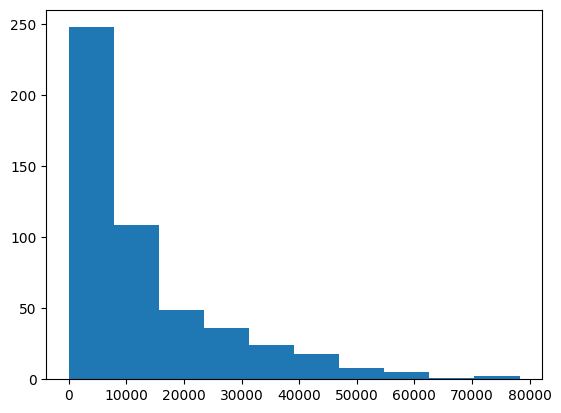

In [26]:
plt.hist(df['damaged'])
plt.show()

In [146]:
df[df['damaged'] > 12631.32800]['damaged'].count()

177

### We can see that damages that are above average are about 35% (177)

### The histogram shows that the damages with very high numbers accross 500 products has few high 

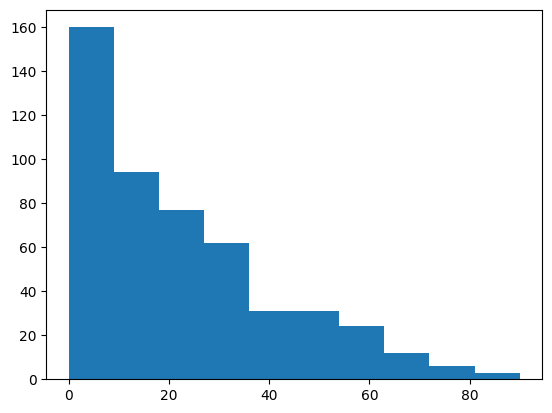

In [28]:
plt.hist(df['damage_rate'])
plt.show()

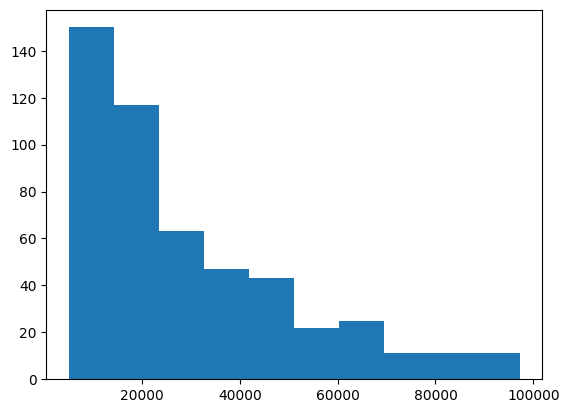

In [30]:
#bins = [0, 5000, 10000, 20000, 50000, 100000]
plt.hist(df['total_sold'])

plt.show()

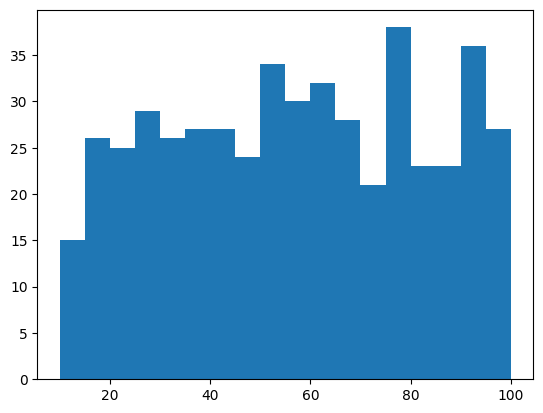

In [32]:
plt.hist(df['sell_through_rate'], bins= [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.show()

### The histogram of total sold is right-skewed. 
* There are progressively fewer products that sold >20 000 units, tapering off to very few near 100 000.
* That tail suggests a small set of “blockbusters” driving the top end.

But when we evaluate the sold products based on the total produced (sell_through_rate column), we see that the distribution is almost even, broadly spread across 10–100%, no one range completely dominates.

* Local peaks around:

    55–60 % (≈ 34 items)
    
    75–80 % (≈ 38 items, the single largest bar here)
    
    85–90 % (≈ 36 items)

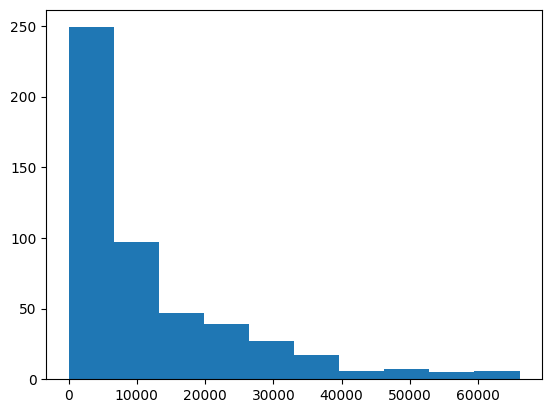

In [35]:
plt.hist(df['unsold_inventory'])
plt.show()

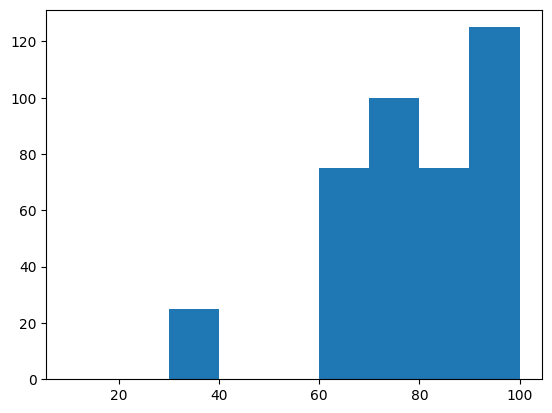

In [37]:
plt.hist(df['price'], bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.show()

### Most of the goods are sold between \\$90-\\$100, and then \\$70-\\$80

+ * + * # $unsold$_$inventory$ 

### I don't really know what the unsold_inventory column represents. If it were in an office setting, it would have been easier to ask and find out.

The number in this column could represent products which fall into any of these categories:
-- 1. Stored/Not marketed yet,
-- 2. Are still being marketed or
-- 3. Were marketed but were not purchased by customers within a given period or at a specific point in time.
(If they were damaged there is a 'damaged' column already for the numbers to be recorded in)


* The meaning of this column (if found) would better explain the 'sell_through_rate', 'damage_rate' and possibly, other columns. It can also help define how I make some calculations, draw conclusions, and make decisions from the dataset.

### For now, Let's assume the 'unsold_inventory' columns contains the number of goods yet to be marketed, and we are trying to find out our best and worst sellers, extract their feature or attributes like 'type', 'price', 'quater'(To know when the are best available), 'duration_before_sell' etc to predict the selling rate of the unsold products when marketing them and maybe know what price and quater of the year to sell them. This will also help us know where to focus our production, and when.

# Feature engineering.

* Create a column 'duration_before_selling' to know how long (in days) it took to sell a product from the manufacturing date
* Create a column 'total_released' to be the actual products marketed. This column should mirror the unsold_inventory and together should sum up to the total product. It will also be the addition of the total_sold and the damaged.
* Calculate new selling rate and damaged rate from the total_released column and create columns for them main_sold_rate and main_damage_rate. This means that the main_sold_rate and main_damage_rate of each product should sum up to 100
* From these we should be able to create a column sold_vs_damaged that compares the main_sold_rate against the main_damage_rate	for every product entry and classify the product as sold if the main_sold_rate is greater than the main_damage_rate, damged if inverse is the case, and 'zeroed' if main_sold_rate against the main_damage_rate are equal.

* We will get our best and worst sellers, the best types, the best quater for products, etc from this transformed data.

In [42]:
df['duration_before_selling (Days)'] = (df['selling_date'] - df['manufacturing_date']).dt.days
df.head(1)

,name,type,total_produced,total_sold,damaged,month,year,edition,price,gender,sell_through_rate,damage_rate,unsold_inventory,estimated_revenue,quarter,date,is_limited_edition,price_bucket,manufacturing_date,selling_date,duration_before_selling (Days)
0,Nike Air Force 1 '07 Sneakers,Creamy,24592,5819,9012,September,1970-01-01 00:00:00.000002017,Limited,115,Men,23.662167,36.646064,9761,669185,Q3,2017-09-01,1,High,2017-09-01,2017-11-06,66


In [44]:
df['total_released'] = df['total_produced'] - df['unsold_inventory']

In [46]:
df.head(2)

,name,type,total_produced,total_sold,damaged,month,year,edition,price,gender,sell_through_rate,damage_rate,unsold_inventory,estimated_revenue,quarter,date,is_limited_edition,price_bucket,manufacturing_date,selling_date,duration_before_selling (Days),total_released
0,Nike Air Force 1 '07 Sneakers,Creamy,24592,5819,9012,September,1970-01-01 00:00:00.000002017,Limited,115,Men,23.662167,36.646064,9761,669185,Q3,2017-09-01,1,High,2017-09-01,2017-11-06,66,14831
1,Adidas Originals Samba OG Shoes,Creamy,81482,16395,38698,September,1970-01-01 00:00:00.000002019,Standard,100,Men,20.121008,47.492698,26389,1639500,Q3,2019-09-01,0,Mid,2019-09-01,2019-09-30,29,55093


In [48]:
df['released_sold_rate'] = (df['total_sold']/df['total_released']) * 100
df['released_damage_rate'] = (df['damaged']/df['total_released']) * 100

In [156]:
x = df['total_sold'].mean()
y = df['damaged'].mean()

print(x, y)

29288.5 12631.328


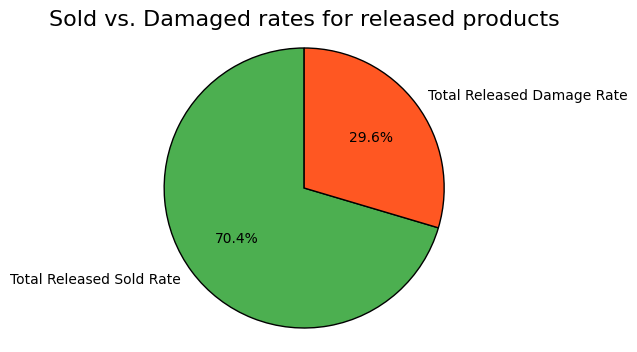

In [50]:
x = df['released_sold_rate'].sum()
y = df['released_damage_rate'].sum()
#z = df['unsold_inventory'].sum()


# Define the labels for each slice
labels = ['Total Released Sold Rate', 'Total Released Damage Rate']

# Define the sizes of the slices (your x and y values)
sizes = [x, y]

# Define colors for the slices (optional, but good for clarity)
colors = ['#4CAF50', '#FF5722'] # Green for sold, Orange/Red for damaged

# Create the pie chart with proper labels
plt.figure(figsize=(6, 4)) # Set a good figure size for better visualization
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Format to display percentages on slices (e.g., 75.0%)
    startangle=90,      # Start the first slice at the top (optional)
    colors=colors,      # Apply custom colors
    wedgeprops={'edgecolor': 'black'} # Add a black border to wedges for clarity
)

# Add a title to the chart
plt.title('Sold vs. Damaged rates for released products', fontsize=16)

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()




### This is the share of more sold unit versus more damaged units from each product that was released only. This measure is the percentage for the total_released products  column and not from the total_produced of which the unsold_inventoryh has a share from.

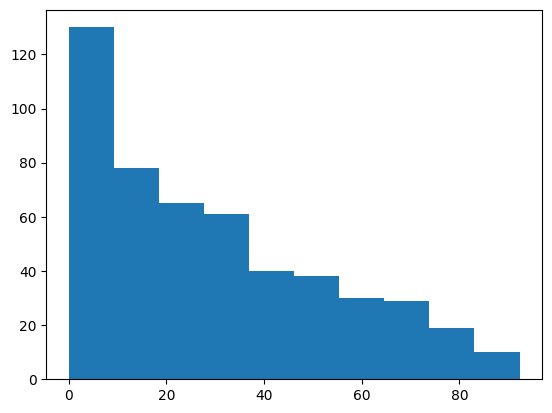

In [186]:
plt.hist(df['released_damage_rate'])
plt.show()

### The released_damage_rate has similar disribution as the 'damaged' and 'damage_rate'

In [245]:
df[df['released_sold_rate'] > 70]['released_sold_rate'].count()

287

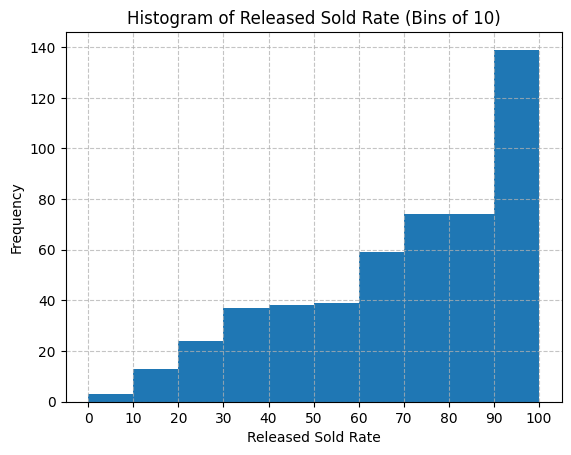

In [199]:
bins_in_tens = list(range(0, 101, 10)) # Creates [0, 10, 20, ..., 100]

plt.hist(df['released_sold_rate'], bins=bins_in_tens)
plt.title('Histogram of Released Sold Rate (Bins of 10)')
plt.xlabel('Released Sold Rate')
plt.ylabel('Frequency')
plt.xticks(bins_in_tens) # This explicitly sets the tick marks at your bin edges
plt.grid(axis='both', alpha=0.75, linestyle='--') # Optional: add a grid for clarity at x-ticks

plt.show()

### So now we see that the selling rate of released products has a different distribution (Left-skewed) from that of the total products. This is a good sign.

* We've seen that more than 50% of released products have a selling rate of 70% and above
* The histogram above shows that more than 130 released products (26%) have a selling rate of 90% and above. This invariably means 

In [52]:
df['Released_Sold_vs_Damaged'] = np.where(df['released_sold_rate'] > df['released_damage_rate'], 'More Sold', 
                          np.where(df['released_damage_rate'] > df['released_sold_rate'], 'More Damaged', 'Equal Sales'))

# This can be our predictor variable during predictive analysis. Where we classify each product to either sold or damaged based on other features.

## This categorization is also from the released products, although it would be the same if it were from the total_produced, that's comparing the total_sold columns against the 'damaged' column, because any product that has more sold units against the number of damaged units from the total produced, would invariably have the same count from the released units because the count is gotten from the number of release units, which is also from the total produced. 

In [54]:
df.head(2)

,name,type,total_produced,total_sold,damaged,month,year,edition,price,gender,sell_through_rate,damage_rate,unsold_inventory,estimated_revenue,quarter,date,is_limited_edition,price_bucket,manufacturing_date,selling_date,duration_before_selling (Days),total_released,released_sold_rate,released_damage_rate,Released_Sold_vs_Damaged
0,Nike Air Force 1 '07 Sneakers,Creamy,24592,5819,9012,September,1970-01-01 00:00:00.000002017,Limited,115,Men,23.662167,36.646064,9761,669185,Q3,2017-09-01,1,High,2017-09-01,2017-11-06,66,14831,39.235385,60.764615,More Damaged
1,Adidas Originals Samba OG Shoes,Creamy,81482,16395,38698,September,1970-01-01 00:00:00.000002019,Standard,100,Men,20.121008,47.492698,26389,1639500,Q3,2019-09-01,0,Mid,2019-09-01,2019-09-30,29,55093,29.758772,70.241228,More Damaged


In [668]:
Sold_Damaged = df['Released_Sold_vs_Damaged'].value_counts()
Total_Sold_Damaged = Sold_Damaged.rename(index={
    'More Sold': 'Percentage of released Sold:',
    'More Damaged': 'Percentage of released Damaged:',
    'equal': 'Percentage of Equal Quantities',
    # Include 'equal' if it's a possible value
})

Total_Sold_Damaged

print(
    f" Percentage of products that sold more vs those that damged more from the total released units is:\
    {Total_Sold_Damaged}"
)







 Percentage of products that sold more vs those that damged more from the total released units is:    Released_Sold_vs_Damaged
Percentage of released Sold:       385
Percentage of released Damaged:    115
Name: count, dtype: int64


In [664]:
Sold_Damaged = df['Released_Sold_vs_Damaged'].value_counts(normalize=True)
Sold_Damaged = (Sold_Damaged.rename(index={
    'More Sold': 'Percentage of released Sold:',
    'More Damaged': 'Percentage of released Damaged:',
    'equal': 'Percentage of Equal Quantities',
    # Include 'equal' if it's a possible value
})* 100)

Percentage_Sold_Damaged = Sold_Damaged.map('{:.2f}%'.format)

print(
    f" Percentage of products that sold more vs those that damged more from the total released units is:\
    {Percentage_Sold_Damaged}"
)


 Percentage of products that sold more vs those that damged more from the total released units is:    Released_Sold_vs_Damaged
Percentage of released Sold:       77.00%
Percentage of released Damaged:    23.00%
Name: proportion, dtype: object


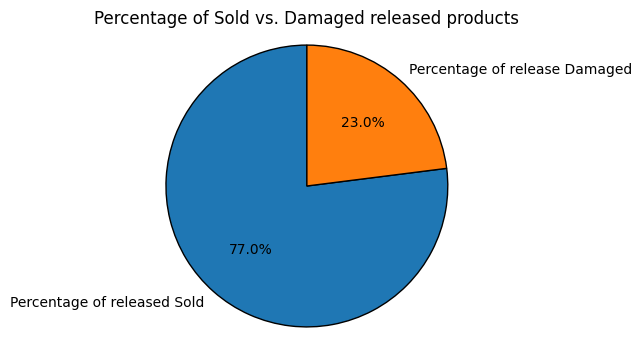

In [72]:

# Define the labels for each slice
labels = ['Percentage of released Sold', 'Percentage of release Damaged']

plt.figure(figsize=(4, 4))
plt.pie(
    df['Released_Sold_vs_Damaged'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',  # Format to display percentages on slices (e.g., 75.0%)
    startangle=90,      # Start the first slice at the top (optional),
    wedgeprops={'edgecolor': 'black'} # Add a black border to wedges for clarity
)

plt.title('Percentage of Sold vs. Damaged released products', fontsize=12)

# Ensure the pie chart is drawn as a circle
plt.axis('equal')
plt.show()

### The percentage of released products that had more of it sold (77.00%) is significantly higher than the percentage that had more damaged products than sold ones (23%).

### 385 units of released products sold more than the 115 units that damaged more

* 115 products having more damaged units than sold units is still bad for business.
* Number of sold units should ALWAYS be more than the number of damaged units. The concern should be the difference between the sold and the damged, where the sold units should be atleast 80% of the released products. So we will check the products, that meet this 80% threshhold and they'll be our best sellers.

In [670]:
Check_total_Sold_vs_Damaged = np.where(df['sell_through_rate'] > df['damage_rate'], 'Sold', 
                          np.where(df['damage_rate'] > df['sell_through_rate'], 'damaged', 'equal'))


total_Sold_Damage = pd.Series(Check_total_Sold_vs_Damaged).value_counts(normalize=True).rename(index={
    'Sold': 'Percentage Sold',
    'damaged': 'Percentage Damaged',
    'equal': 'Percentage of Equal Quantities',
    # Include 'equal' if it's a possible value
})* 100


total_Sold_Damage = total_Sold_Damage.map('{:.2f}%'.format)

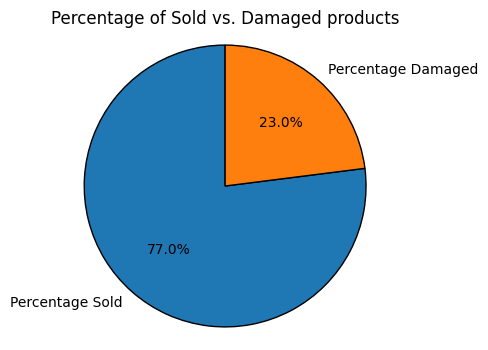

In [124]:

# Define the labels for each slice
labels = ['Percentage Sold', 'Percentage Damaged']

plt.figure(figsize=(4, 4))
plt.pie(
    total_Sold_Damage,
    labels=labels,
    autopct='%1.1f%%',  # Format to display percentages on slices (e.g., 75.0%)
    startangle=90,      # Start the first slice at the top (optional),
    wedgeprops={'edgecolor': 'black'} # Add a black border to wedges for clarity
)

plt.title('Percentage of Sold vs. Damaged products', fontsize=12)

# Ensure the pie chart is drawn as a circle
plt.axis('equal')
plt.show()

# Let's extract the Best and Worst sellers, and analyze their attributes.

## I will use an 80-20 % threshold for this extraction. 
* Best sellers would be products with released sold rate of at least 80%, this will inturn mean the damage rate would be 20% since these rates are from the released products and are of two categories only, they should sum up to 100% for each product.
* Worst sellers would be the inverse. Products with released damage rate of at least 80%, this will inturn mean the sold rate would be 20%.

In [282]:

more_sold = df.loc[df['Released_Sold_vs_Damaged'] == 'More Sold']
more_damaged = df.loc[df['Released_Sold_vs_Damaged'] == 'More Damaged']

In [674]:
best_sellers = more_sold.loc[more_sold['released_sold_rate'] >= 80]['name']
best_sellers = best_sellers.value_counts()
best_sellers = pd.DataFrame(best_sellers)
best_sellers= best_sellers.reset_index()
best_sellers
#best_sellers.sort_values(by='name')

,name,count
0,Air Jordan 1 Mid Shoes,14
1,Fila Disruptor II Premium,13
2,Onitsuka Tiger Mexico 66,13
3,Superga 2750 Cotu Classic,13
4,Lacoste Carnaby Evo,12
5,Adidas Originals Samba OG Shoes,12
6,Converse Chuck Taylor All Star,12
7,Puma Smash V2 Sneakers,12
8,Reebok Classic Leather,12
9,Nike Air Force 1 '07 Sneakers,12


## The list contains all the products (20) and the number of times they reached or crossed the 80% threshold probably with different types, in different quarters and different other attributes.

In [354]:
worst_sellers = more_damaged.loc[more_damaged['released_damage_rate'] >= 80]['name']
worst_sellers = worst_sellers.value_counts()
worst_sellers = pd.DataFrame(worst_sellers)
worst_sellers= worst_sellers.reset_index()
worst_sellers
#best_sellers.sort_values(by='name')

,name,count
0,New Balance 574 Core,3
1,Nike Air Force 1 '07 Sneakers,2
2,Nike Court Vision Low Shoes,2
3,Hoka One One Clifton 8,2
4,Saucony Jazz Original,1
5,Adidas Originals Samba OG Shoes,1
6,Fila Disruptor II Premium,1
7,Air Jordan 1 Mid Shoes,1
8,Vans Old Skool,1
9,Reebok Classic Leather,1


In [376]:
best_vs_worst_sellers = pd.merge(
    best_sellers,
    worst_sellers,
    on='name',          # Column to join on
    how='outer',        # Use 'outer' to keep all rows from both DataFrames
    suffixes=('_best_seller', '_worst_seller') # Suffixes for overlapping column names
)

# Fill NaN values with 0 if a product doesn't exist in one category
best_vs_worst_sellers = best_vs_worst_sellers.fillna(0)
best_vs_worst_sellers

,name,count_best_seller,count_worst_seller
0,ASICS Gel-Quantum 90,11,1.0
1,Adidas Originals Samba OG Shoes,12,1.0
2,Air Jordan 1 Mid Shoes,14,1.0
3,Columbia Trailstorm Waterproof,8,0.0
4,Converse Chuck Taylor All Star,12,0.0
5,Fila Disruptor II Premium,13,1.0
6,Hoka One One Clifton 8,7,2.0
7,Lacoste Carnaby Evo,12,0.0
8,New Balance 574 Core,8,3.0
9,Nike Air Force 1 '07 Sneakers,12,2.0


In [676]:
best_vs_worst_sellers['best_sell_difference'] = best_vs_worst_sellers['count_best_seller'] - best_vs_worst_sellers['count_worst_seller']
filtered_best_sellers = best_vs_worst_sellers.sort_values(by='best_sell_difference', ascending=False)
final_best_sellers = filtered_best_sellers.reset_index(drop=True)
final_best_sellers

,name,count_best_seller,count_worst_seller,best_sold,best_sell_difference
0,Air Jordan 1 Mid Shoes,14,1.0,13.0,13.0
1,Superga 2750 Cotu Classic,13,0.0,13.0,13.0
2,Onitsuka Tiger Mexico 66,13,0.0,13.0,13.0
3,Converse Chuck Taylor All Star,12,0.0,12.0,12.0
4,Fila Disruptor II Premium,13,1.0,12.0,12.0
5,Lacoste Carnaby Evo,12,0.0,12.0,12.0
6,Puma Smash V2 Sneakers,12,0.0,12.0,12.0
7,Reebok Classic Leather,12,1.0,11.0,11.0
8,Skechers D'Lites,11,0.0,11.0,11.0
9,Adidas Originals Samba OG Shoes,12,1.0,11.0,11.0


## I call these the best sellers because almost every time they were produced and released for sell, there were more sold more units than damaged units.

### Other features about them cam be extracted using filtering now that they are known. Except their types, extracting other features is beyond the scope of this current analysis and can easily be extracted on request.

In [430]:
best_seller_and_types =  df.loc[df['released_sold_rate'] >= 80][['name', 'type']]
best_seller_and_types = best_seller_and_types.groupby(['name'])['type'].value_counts()
best_seller_and_types


with pd.option_context('display.max_rows', None):
    display(best_seller_and_types)




name                             type           
ASICS Gel-Quantum 90             White Chocolate    5
                                 Brownie            2
                                 Peanut Butter      2
                                 Almond             1
                                 Classic            1
Adidas Originals Samba OG Shoes  White Chocolate    3
                                 Almond             2
                                 Classic            2
                                 Creamy             2
                                 Brownie            1
                                 Crisper            1
                                 Peanut Butter      1
Air Jordan 1 Mid Shoes           Creamy             3
                                 Crisper            3
                                 White Chocolate    3
                                 Brownie            2
                                 Peanut Butter      2
                                 

### Best selling types based on my 80% solling rate threshhold

In [489]:
best_types = pd.DataFrame(best_seller_and_types).reset_index()

best_types.groupby(['type'])['count'].count().sort_values(ascending=False)

type
Brownie            20
Creamy             16
Crisper            16
White Chocolate    16
Almond             15
Classic            15
Peanut Butter      14
Name: count, dtype: int64

### This (Above) is the number of best sellers that had this tpye. All the best sellers have the Brownie type, 16 of them have each of the Creamy, 
Crispe, and the 
White Chocolattypes, 15 of them have each of the Almond and Classic types while 14 best sellers have the Peanut Butter type.16

In [656]:
best_types = pd.DataFrame(best_seller_and_types).reset_index()


best_types = best_types.groupby(['type'])['count'].sum().sort_values(ascending=False)

## This data shows the total number of times the best selling types were used on the best sellers.

### It is now clear that the **_Brownie_** type, have being used the most and being on all our best sellers, is our best selling type.

### The White Chocolate and the Crisper types follow closely behind as our second and third best selling type, have but being used 34 & 31 times respectively accross 16 of the best sellers

In [547]:
best_selling_duration =  df.loc[df['released_sold_rate'] >= 80][['name', 'duration_before_selling (Days)']]
best_selling_duration = best_selling_duration.groupby(['name'])['duration_before_selling (Days)'].sum()
fastest_best_sellers = pd.DataFrame(best_selling_duration).reset_index().sort_values(by = 'duration_before_selling (Days)')


fastest_best_sellers.reset_index(drop=True)


,name,duration_before_selling (Days)
0,Under Armour Charged Assert 9,209
1,New Balance 574 Core,407
2,Saucony Jazz Original,431
3,ASICS Gel-Quantum 90,440
4,Nike Court Vision Low Shoes,442
5,Hoka One One Clifton 8,448
6,Onitsuka Tiger Mexico 66,470
7,Vans Old Skool,478
8,Skechers D'Lites,498
9,Columbia Trailstorm Waterproof,522


### It appear only 3 products from our top ten best sellers (ASICS Gel-Quantum 90, Onitsuka Tiger Mexico 66, and Skechers D'Lites) make it to the top ten of the fastest best sellers.

In [634]:
df['duration_before_selling (Days)'].nsmallest()

84     15
110    15
144    15
172    15
207    15
Name: duration_before_selling (Days), dtype: int64

In [680]:
fast_high_rate = df.loc[(df['duration_before_selling (Days)'] <= 60) & (df['released_sold_rate'] >= 80)] [['name', 'duration_before_selling (Days)', 'type', 'released_sold_rate', 'quarter']]
fast_high_rate = fast_high_rate.groupby(['name', 'type'], as_index=False).agg(
    total_duration_before_selling=('duration_before_selling (Days)', 'sum'),
    average_released_sold_rate=('released_sold_rate', 'mean'),
    quarter=('quarter', 'first')
)

combined_best_choice = pd.DataFrame(fast_high_rate).sort_values(by =['average_released_sold_rate', 'total_duration_before_selling'], ascending=[False,True])
with pd.option_context('display.max_rows', None):
    display(combined_best_choice)



,name,type,total_duration_before_selling,average_released_sold_rate,quarter
69,Saucony Jazz Original,Almond,60,99.935761,Q4
52,Onitsuka Tiger Mexico 66,Classic,40,99.891602,Q2
63,Red Tape Casual Sneakers,Crisper,34,99.725818,Q2
91,Vans Old Skool,Peanut Butter,19,99.716688,Q4
88,Vans Old Skool,Classic,46,99.672050,Q2
47,Nike Court Vision Low Shoes,Classic,31,99.516852,Q1
74,Skechers D'Lites,Brownie,28,99.434731,Q3
32,Lacoste Carnaby Evo,Brownie,30,99.288321,Q2
11,Air Jordan 1 Mid Shoes,Brownie,59,99.089463,Q3
50,Onitsuka Tiger Mexico 66,Almond,17,99.078191,Q3


## The table above can be used by the management or production team to make best choices based on the quarter, or number of days the want to quickly make turn overs from sales.

## I can also pull out this tabel to shared required insights and answer new questions.

# Also, I can easily produce the other end of this table, I can mirror it and give out the combined_worst_choice.

In [682]:
Total_Sold_Damaged.to_csv('Total_Sold_Damaged.csv', index=False)
Percentage_Sold_Damaged.to_csv('Percentage_Sold_Damaged.csv', index=False)
more_sold.to_csv('more_sold.csv', index=False)
more_damaged.to_csv('more_damaged.csv', index=False)
best_sellers.to_csv('best_sellers.csv', index=False)
worst_sellers.to_csv('worst_sellers.csv', index=False)
best_vs_worst_sellers.to_csv('best_vs_worst_sellers.csv', index=False)
final_best_sellers.to_csv('final_best_sellers.csv', index=False)
best_seller_and_types.to_csv('best_seller_and_types.csv', index=False)
best_types.to_csv('best_types.csv', index=False)
combined_best_choice.to_csv('combined_best_choice.csv', index=False)

# I will pause the analysis here, and see if I'll go create dashboards, and write reports.